In [1]:
# Program to predict whether house price will be above the median price or not

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
house = pd.read_csv("https://raw.githubusercontent.com/AnubhaT-code/Machine-Learning-Projects/main/HousePrices.csv")

# Exploratory Data Analysis

In [4]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
house.shape

(1460, 81)

In [6]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

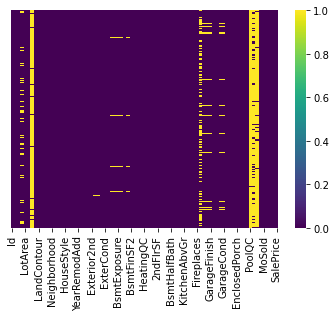

In [10]:
sns.heatmap(house.isnull(),yticklabels=False,cmap="viridis")

In [11]:
house.drop("LotFrontage",axis=1,inplace=True)

In [12]:
house.drop("Alley",axis=1,inplace=True)

In [13]:
house.drop("FireplaceQu",axis=1,inplace=True)

In [14]:
house.drop("PoolQC",axis=1,inplace=True)

In [15]:
house.drop("Fence",axis=1,inplace=True)

In [16]:
house.drop("MiscFeature",axis=1,inplace=True)

In [17]:
house.drop("GarageCond",axis=1,inplace=True)

In [18]:
house.drop("GarageQual",axis=1,inplace=True)

In [19]:
house.drop("GarageFinish",axis=1,inplace=True)

In [20]:
house.drop("GarageYrBlt",axis=1,inplace=True)

In [21]:
house.drop("GarageType",axis=1,inplace=True)

In [22]:
house.drop("MasVnrType",axis=1,inplace=True)

In [23]:
house.drop("MasVnrArea",axis=1,inplace=True)

In [24]:
house.drop("BsmtQual",axis=1,inplace=True)

In [25]:
house.drop("BsmtCond",axis=1,inplace=True)

In [26]:
house.drop("BsmtExposure",axis=1,inplace=True)

In [27]:
house.drop("BsmtFinType1",axis=1,inplace=True)

In [28]:
house.drop("BsmtFinType2",axis=1,inplace=True)

In [29]:
house.drop("Electrical",axis=1,inplace=True)

In [30]:
house=house.select_dtypes(exclude=['object'])

In [31]:
house.shape

(1460, 35)

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [33]:
house.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Analyse the data

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

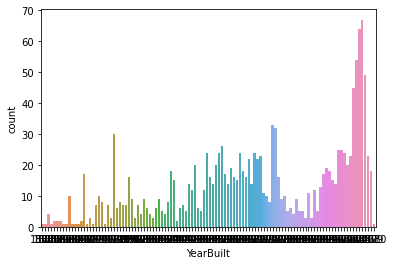

In [34]:
sns.countplot(x="YearBuilt",data=house)

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

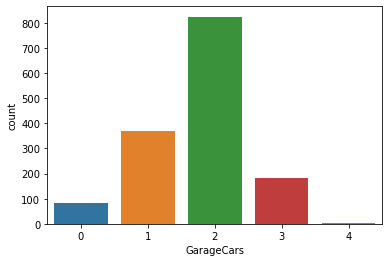

In [35]:
sns.countplot(x="GarageCars",data=house)

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

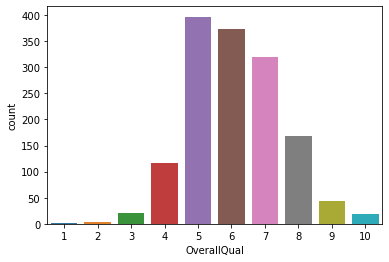

In [36]:
sns.countplot(x="OverallQual",data=house)

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

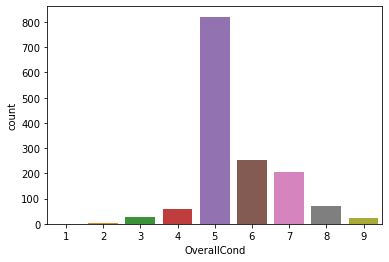

In [37]:
sns.countplot(x="OverallCond",data=house)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

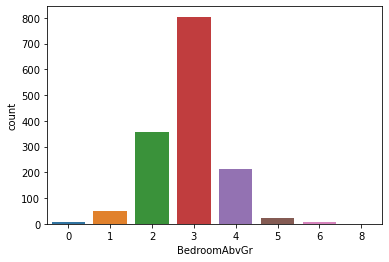

In [38]:
sns.countplot(x="BedroomAbvGr",data=house)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

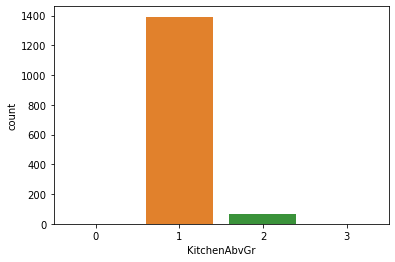

In [39]:
sns.countplot(x="KitchenAbvGr",data=house)

<AxesSubplot:xlabel='YrSold', ylabel='count'>

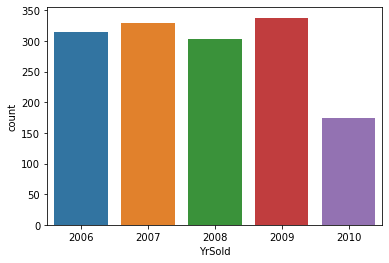

In [40]:
sns.countplot(x="YrSold",data=house)

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

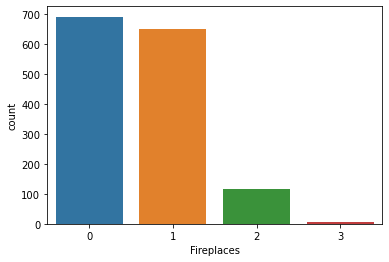

In [41]:
sns.countplot(x="Fireplaces",data=house)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='OverallQual'>

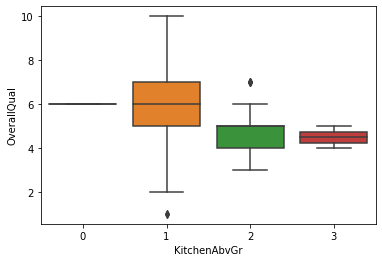

In [42]:
sns.boxplot(x="KitchenAbvGr",y="OverallQual",data=house)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='OverallQual'>

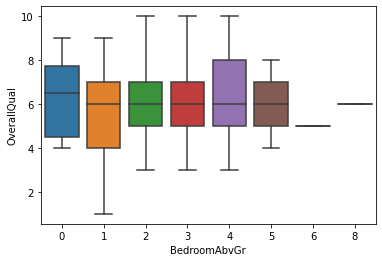

In [43]:
sns.boxplot(x="BedroomAbvGr",y="OverallQual",data=house)

<AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>

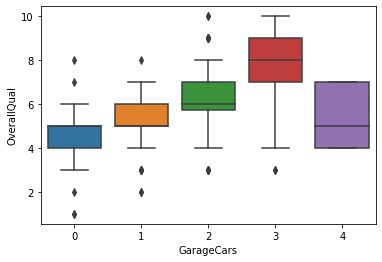

In [44]:
sns.boxplot(x="GarageCars",y="OverallQual",data=house)

<AxesSubplot:>

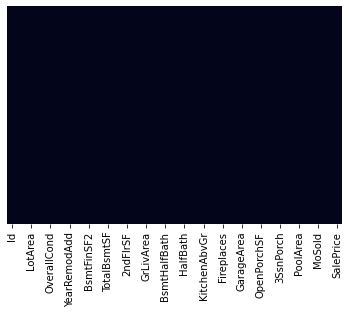

In [45]:
sns.heatmap(house.isnull(),yticklabels=False,cbar=False)

In [46]:
YrSold=pd.get_dummies(house["YrSold"])
YrSold.head(20)

2006  2007  2008  2009  2010
0      0     0     1     0     0
1      0     1     0     0     0
2      0     0     1     0     0
3      1     0     0     0     0
4      0     0     1     0     0
5      0     0     0     1     0
6      0     1     0     0     0
7      0     0     0     1     0
8      0     0     1     0     0
9      0     0     1     0     0
10     0     0     1     0     0
11     1     0     0     0     0
12     0     0     1     0     0
13     0     1     0     0     0
14     0     0     1     0     0
15     0     1     0     0     0
16     0     0     0     0     1
17     1     0     0     0     0
18     0     0     1     0     0
19     0     0     0     1     0

array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='Id'>,
        <AxesSubplot:xlabel='LotArea', ylabel='Id'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='Id'>,
        <AxesSubplot:xlabel='YrSold', ylabel='Id'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='LotArea', ylabel='MSSubClass'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='YrSold', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>],
       [<AxesSubplot:xlabel='Id', ylabel='LotArea'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='LotArea'>,
        <AxesSubplot:xlabel='LotArea', ylabel='LotArea'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='LotArea'>,
        <AxesSubplot:xlabel='YrSold', ylabel='LotArea'>,
        <AxesSubp

<Figure size 432x288 with 0 Axes>

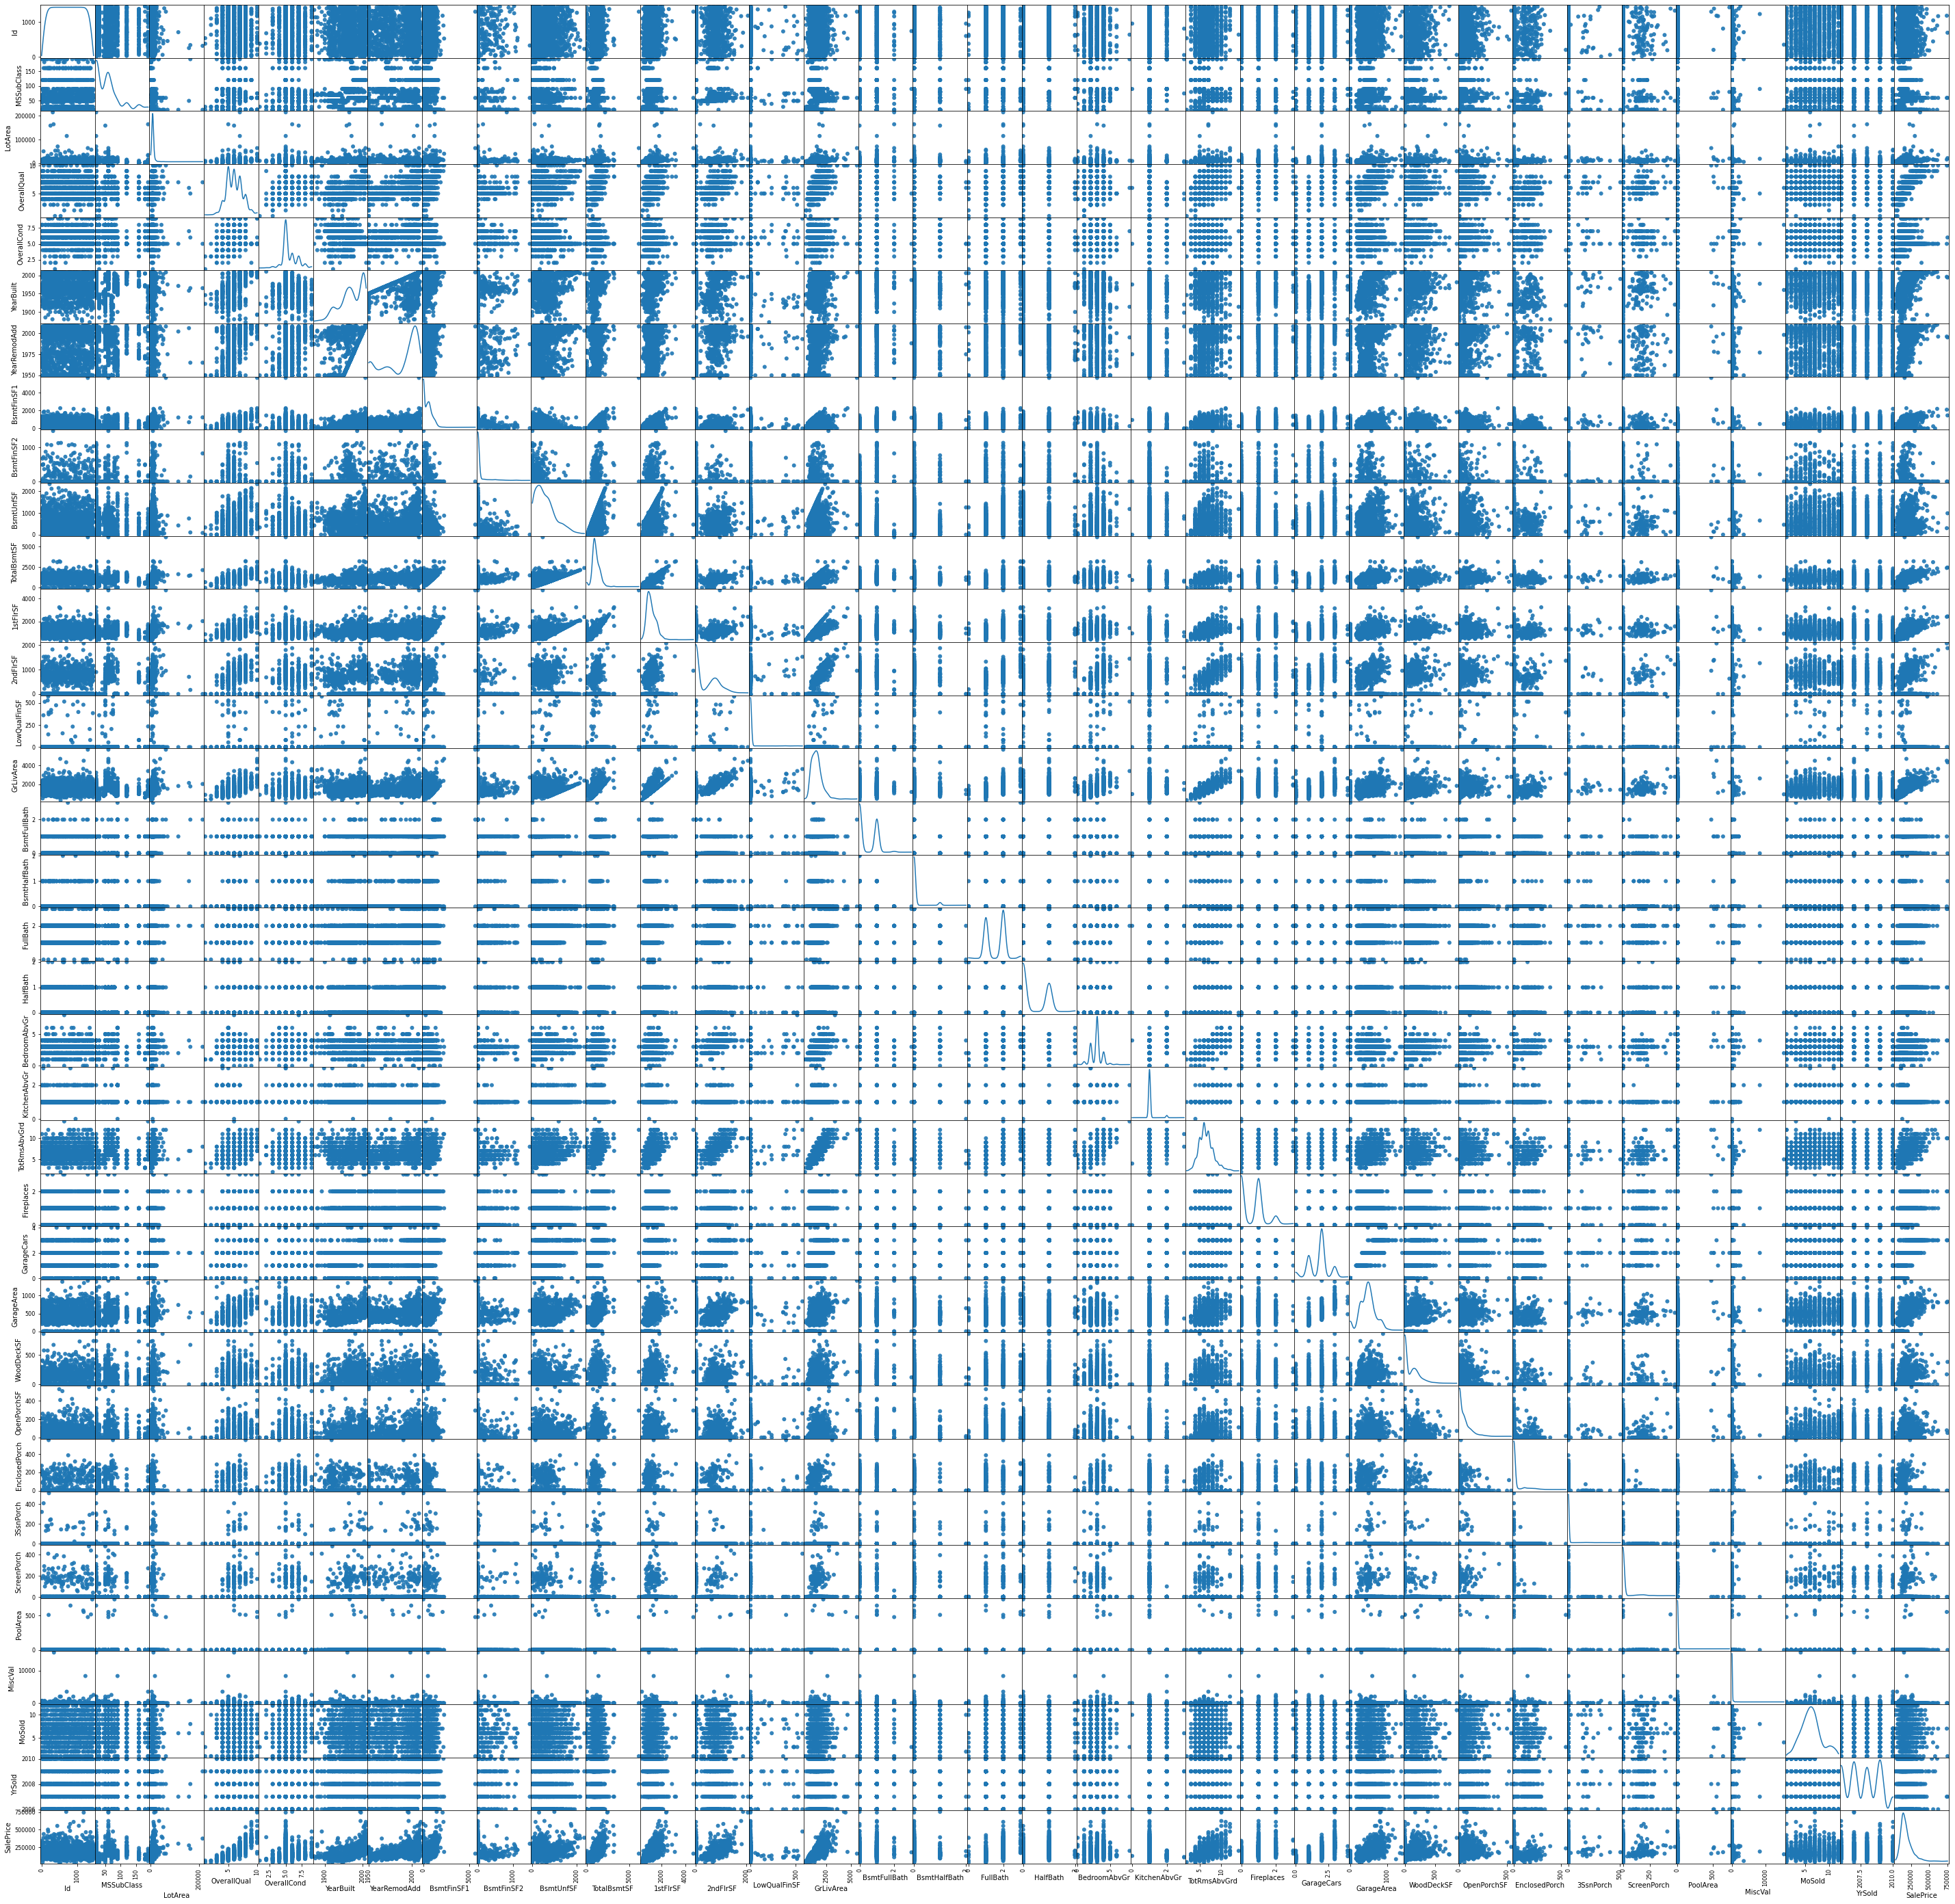

In [47]:
# Display scatter_matrix for all the variables
fig = plt.figure()
scatter_matrix(house,figsize = (50,50), alpha=0.9, diagonal="kde",marker="o")

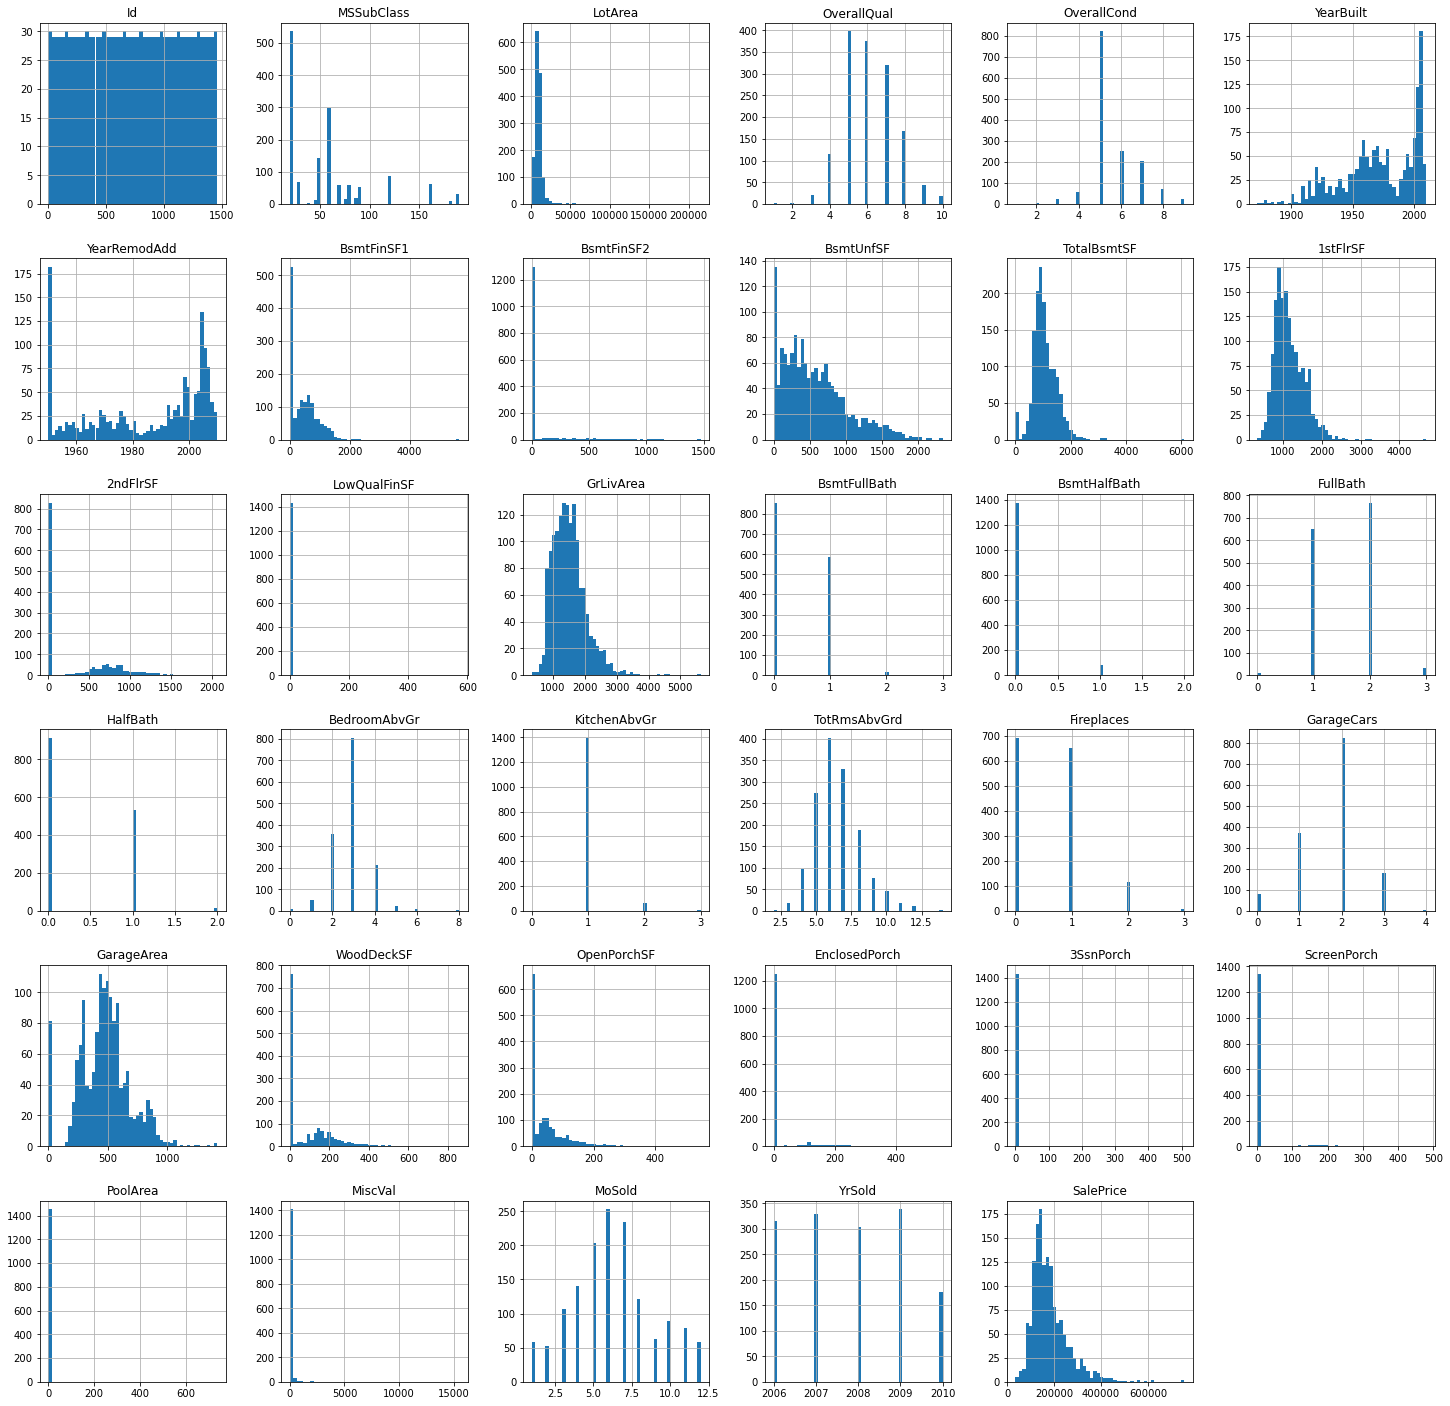

In [48]:
# Plotting the histogram
house.hist(figsize=(25,25),bins=50);

In [49]:
# Correlation matrix
hcorr = house.corr()
hcorr.style.background_gradient()

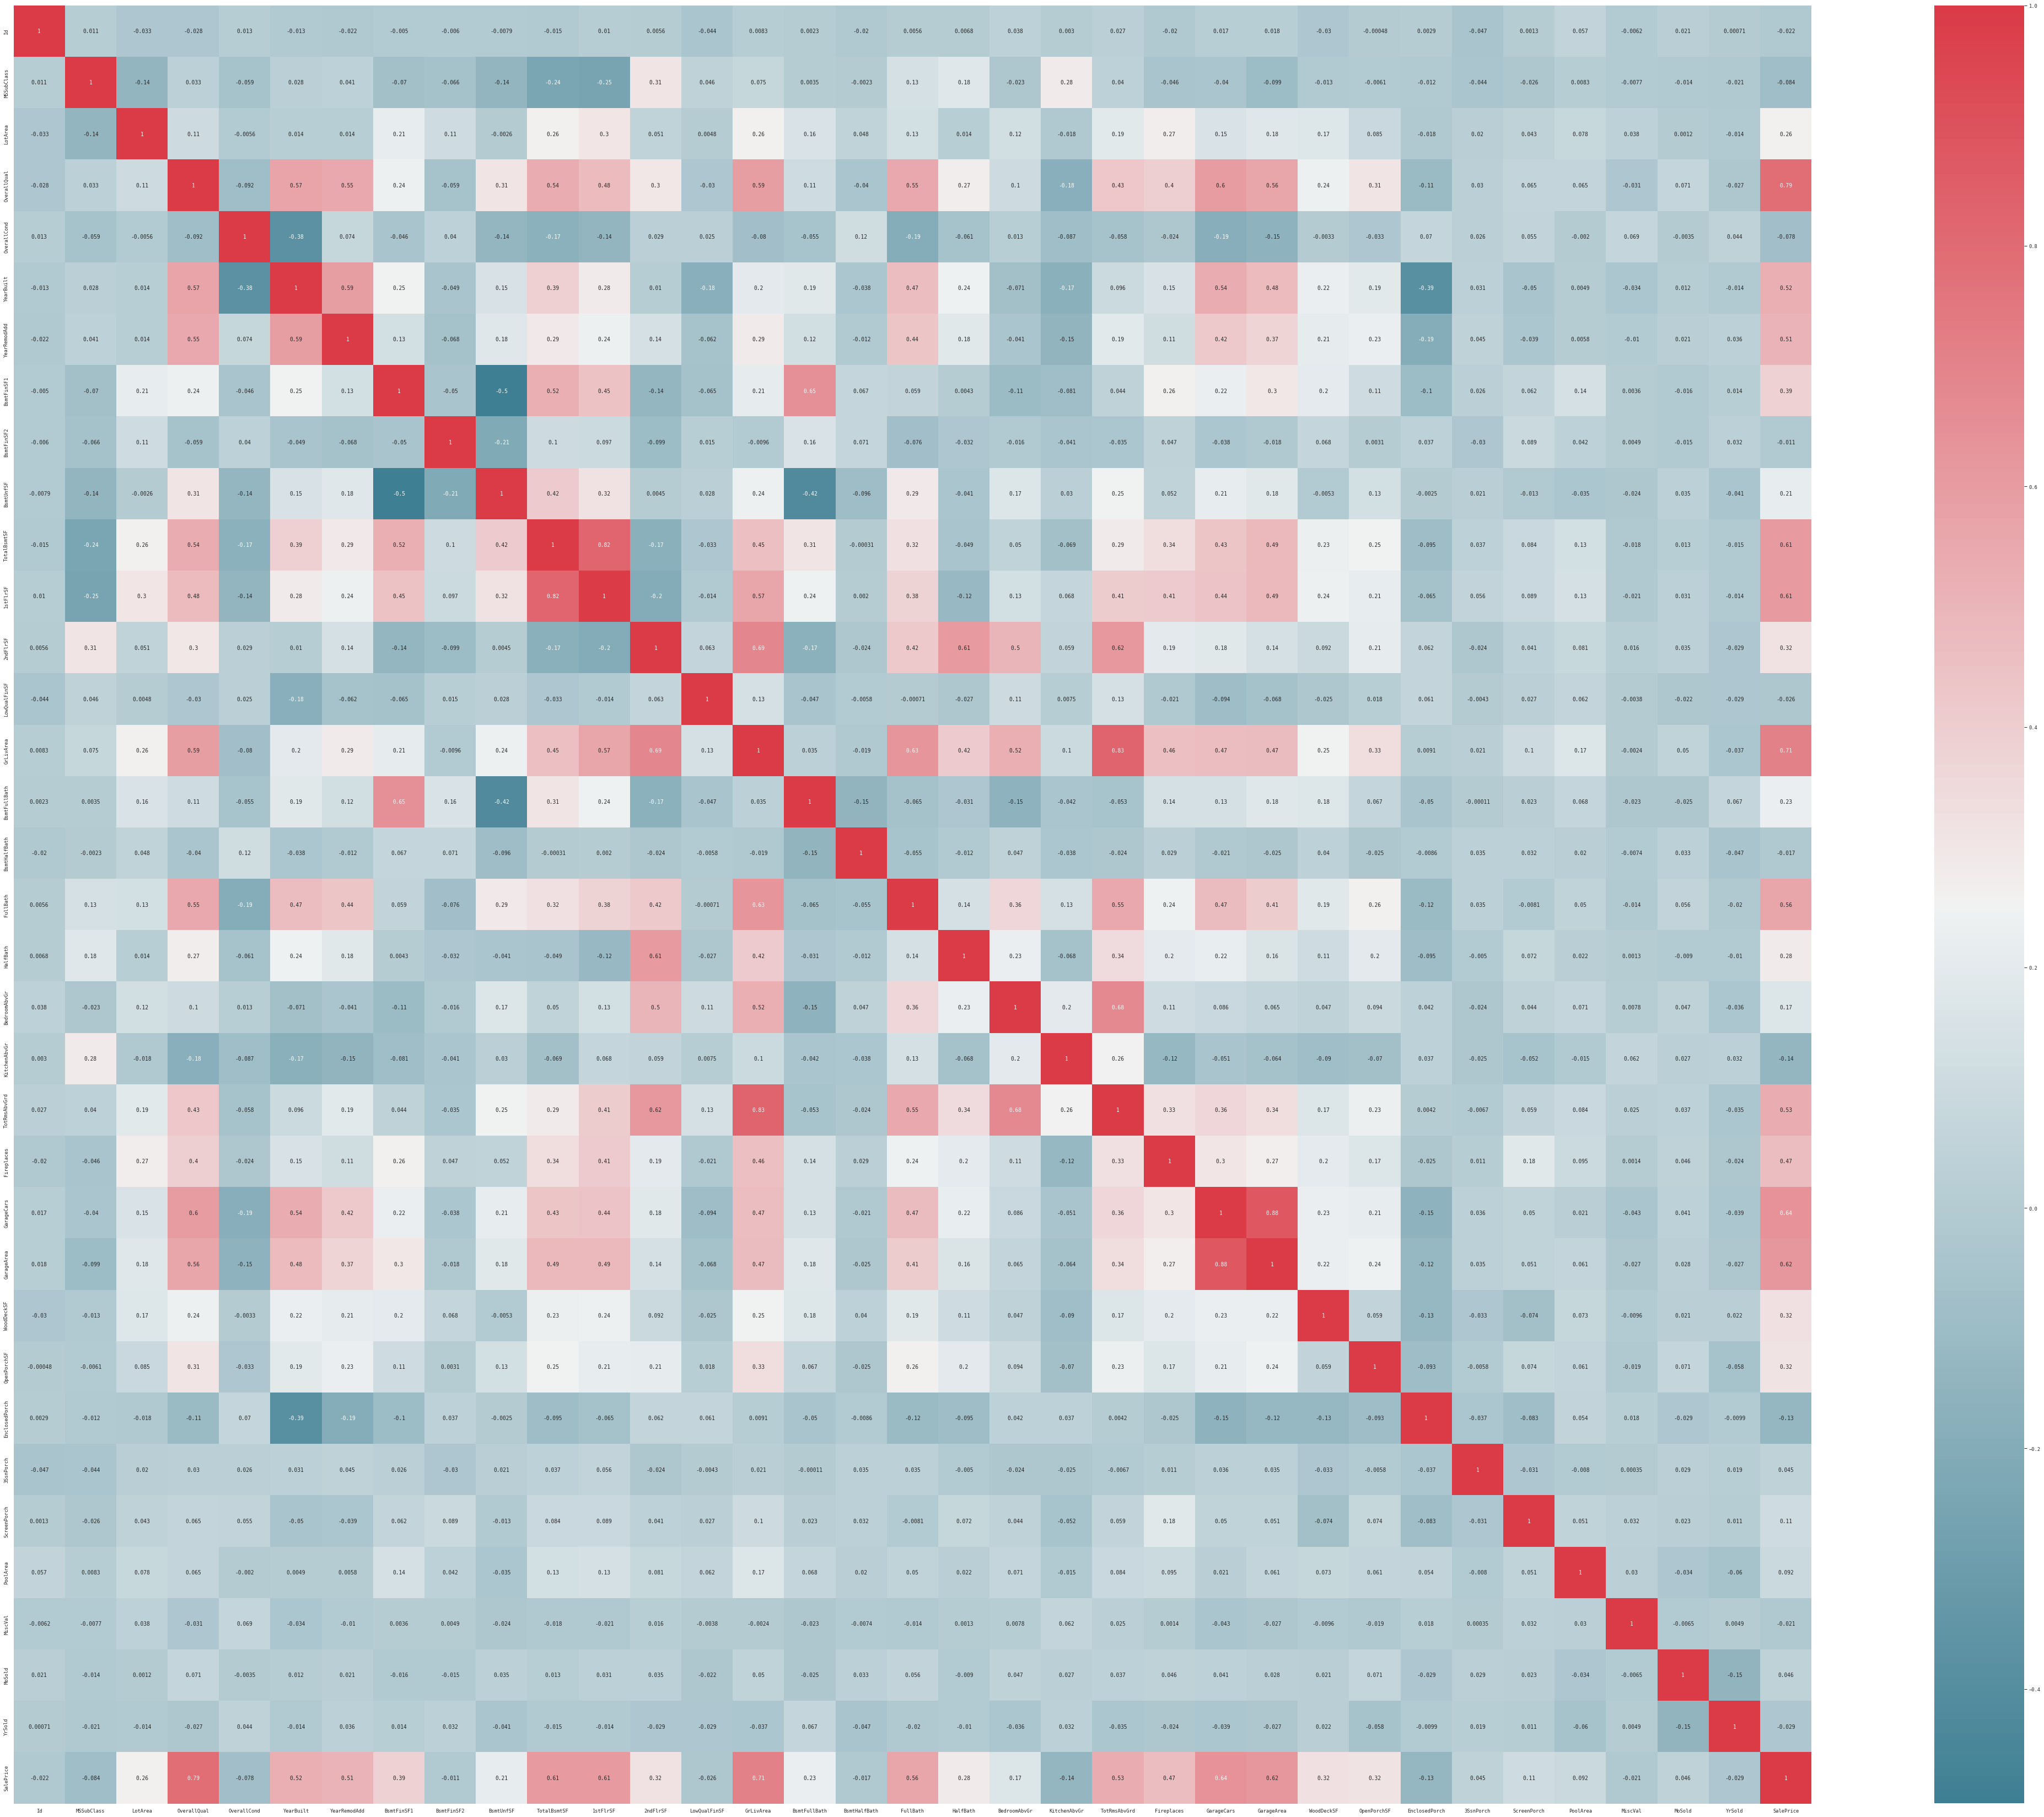

In [50]:
# Heatmap using seaborn - set the context for plotting
sns.set(context="paper",font="monospace")
house_corr_matrix = house.corr()

# Set the matplotlib figure
fig, axe = plt.subplots(figsize=(80,60))

# Generate color palettes
cmap = sns.diverging_palette(220,10,center = "light" , as_cmap=True)

# Draw the heatmap
sns.heatmap(house_corr_matrix, vmax=1, square=True, cmap=cmap, annot=True );

In [51]:
house.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411  ...   
std      30.202904     20.645407   456.098091   161.319273   441.866955  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000  ...   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000  ...   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000  ...   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

# Identify Correlation in data

In [52]:
house.corr() # It will show correlation matrix

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id             -0.012713     -0.021998   -0.005024   -0.005968  -0.007940   
MSSubClass      0.027850      0.040581   -0.069836   -0.065649  -0.140759   
LotArea         0.014228      0.013788    0.214103    0.111170  -0.002618   
OverallQual     0.572323      0.550684    0.239666   -0.059119   0.308159   
OverallCond    -0.375983      0.073741   -0.046231    0.040229  -0.136841   
YearBuilt       1.000000      0.592855    0.249503   -0.049107   0.149040   
YearRemodAdd    0.592855      1.000000    0.128451   -0.067759   0.181133   
BsmtFinSF1      0.249503      0.128451    1.000000   -0.050117  -0.495251   
BsmtFinSF2     -0.049107     -0.067759   -0.050117    1.000000  -0.209294   
BsmtUnfSF       0.149040      0.181133   -0.495251   -0.209294   1.000000   
TotalBsmtSF     0.391452      0.291066    0.522396    0.104810   0.415360   
1stFlrSF        0.281986      0.240379    0.445863    0.097117   0.317987   
2ndFlrSF        0.010308      0.140024   -0.137079   -0.099260   0.004469   
LowQualFinSF   -0.183784     -0.062419   -0.064503    0.014807   0.028167   
GrLivArea       0.199010      0.287389    0.208171   -0.009640   0.240257   
BsmtFullBath    0.187599      0.119470    0.649212    0.158678  -0.422900   
BsmtHalfBat

In [53]:
# However we want to see correlation in graphical representation so below is function
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

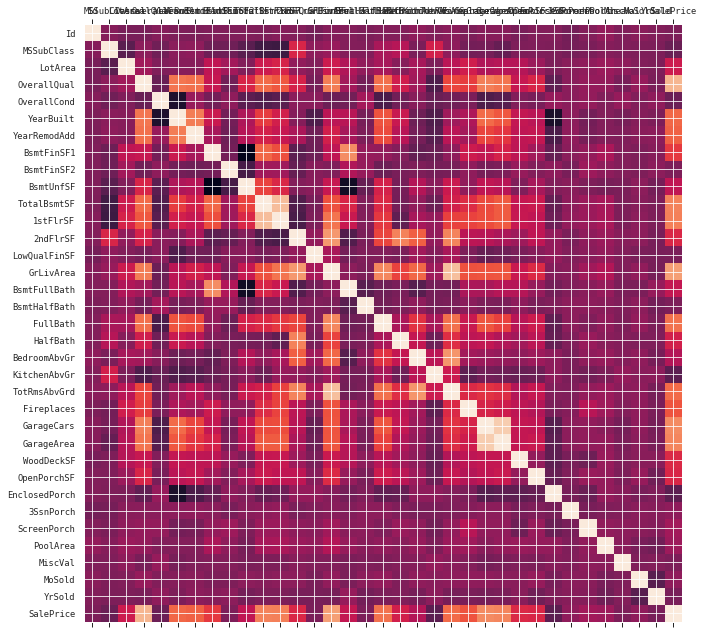

In [54]:
plot_corr(house)

In [55]:
# Split the data set into independent (X) and dependent (Y) data sets
X = house.iloc[:,2:61].values
Y = house.iloc[:,1].values

In [56]:
# Splitting data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 0)

In [57]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_train shape {} and size {}".format(X_test.shape,X_test.size))
print("X_train shape {} and size {}".format(Y_train.shape,Y_train.size))
print("X_train shape {} and size {}".format(Y_test.shape,Y_test.size))

X_train shape (1168, 33) and size 38544
X_train shape (292, 33) and size 9636
X_train shape (1168,) and size 1168
X_train shape (292,) and size 292


In [58]:
# Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
model = LogisticRegression()
model.fit(X_train,Y_train)

D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predictions= model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8013698630136986

In [63]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [64]:
print(dtree.score(X_train,Y_train))
print(dtree.score(X_test,Y_test))

1.0
0.7431506849315068


In [65]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth = 5,random_state=1)
dtree.fit(X_train,Y_train)
print(dtree.score(X_train,Y_train))
print(dtree.score(X_test,Y_test))

0.8698630136986302
0.7773972602739726


In [66]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=50,base_estimator=dtree,random_state=1)
bgcl = bgcl.fit(X_train,Y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_train,Y_train))
print(bgcl.score(X_test,Y_test))

0.8767123287671232
0.797945205479452


In [67]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=500,random_state=1)
abcl = abcl.fit(X_train,Y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_train,Y_train))
print(abcl.score(X_test,Y_test))

0.7337328767123288
0.702054794520548


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = BaggingClassifier( n_estimators=1000,random_state=1)
gbcl = gbcl.fit(X_train,Y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train,Y_train))
print(gbcl.score(X_test,Y_test))

1.0
0.8013698630136986


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier( n_estimators=50,random_state=1,max_features=7)
rfcl = rfcl.fit(X_train,Y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_train,Y_train))
print(rfcl.score(X_test,Y_test))

1.0
0.8047945205479452


In [70]:
# test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,predictions)
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print("Testing Accuracy = ", (TP + TN) / (TP + TN + FN + FP))

[[101   0   0   0   0   0   0   0   0   0   0   4   0   0   1]
 [  3  10   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  21   2   2   1   1   0   0   0   1   0   0]
 [  0   0   0   0   1  53   0   0   0   0   0   0   1   0   1]
 [  0   0   0   0   3   0   7   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0   1   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   3   0   0   1   0   0   0   0   0   0]
 [  5   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  11   0   0   0   1]
 [  2   0   0   0   0   0   0   0   1   0   0  16   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   2   0   1   0]
 [  1   0   0   0   2   0   1   0   0   0   0   0   0   0   2]]
Testing Accuracy =  0.9736842105263158
